# Dry Bean Dataset Classification

The dry bean, the most widely grown edible legume crop in the world, has a wide variety of genetic variability. There is no doubt that seed quality affects crop production. In order to supply the fundamentals of sustainable agricultural systems, seed classification is crucial for both marketing and production. This study's main goal is to offer a process for obtaining consistent seed varieties from population-based crop production, which prevents the seeds from being verified as belonging to a single variety.

The bean is classified into 7 different categories which are BARBUNYA, BOMBAY, CALI, DERMASON, HOROZ, SIRA, SEKER 

# Data exploration and pre-processing:

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#reading the csv file
df = pd.read_csv('bean.csv')

In [3]:
#number of columns and rows in the dataset
df.shape

(13611, 17)

In [4]:
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13593.000000,13611.000000,13611.000000,13424.000000,13395.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.751171,53768.200206,253.064220,0.749393,0.987098,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.091726,29774.915817,59.177120,0.049309,0.004674,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.716214,36714.500000,215.068003,0.717881,0.985594,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764568,45178.000000,238.438026,0.759225,0.988243,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810544,62294.000000,279.446467,0.786895,0.989976,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
#The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13593 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13424 non-null  float64
 9   Solidity         13395 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
#first 5 records 
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
#last 5 records
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [8]:
#how many rows have null values in the respective columns
df.isnull().sum()

Area                 0
Perimeter            0
MajorAxisLength      0
MinorAxisLength      0
AspectRation         0
Eccentricity        18
ConvexArea           0
EquivDiameter        0
Extent             187
Solidity           216
roundness            0
Compactness          0
ShapeFactor1         0
ShapeFactor2         0
ShapeFactor3         0
ShapeFactor4         0
Class                0
dtype: int64

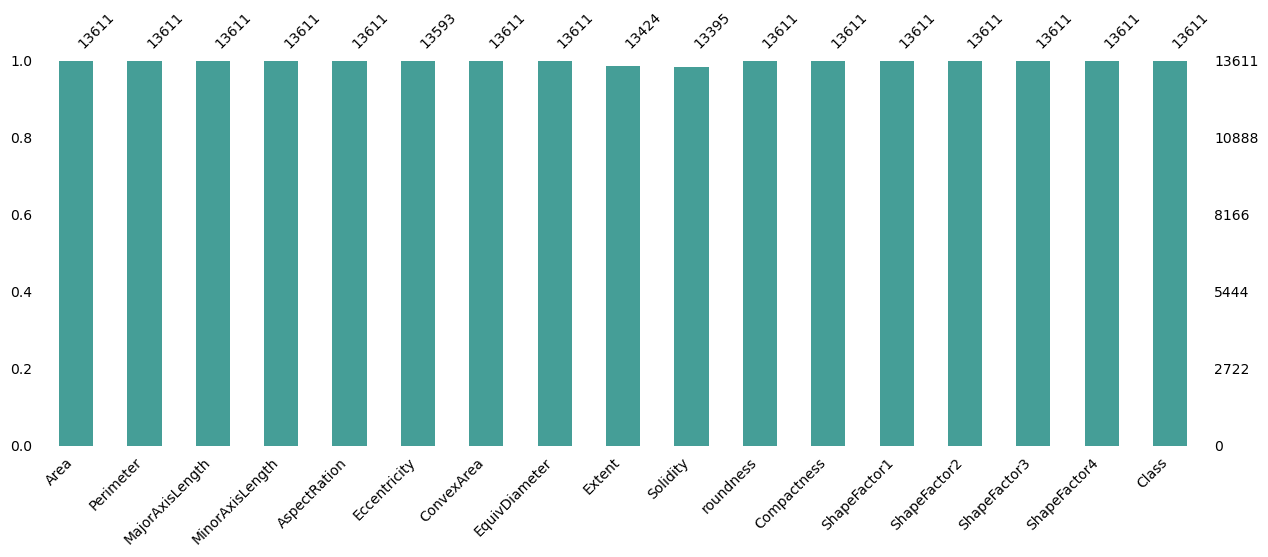

In [9]:
msno.bar(df,figsize=(15, 5),fontsize=10,color = '#459E97');

<AxesSubplot:>

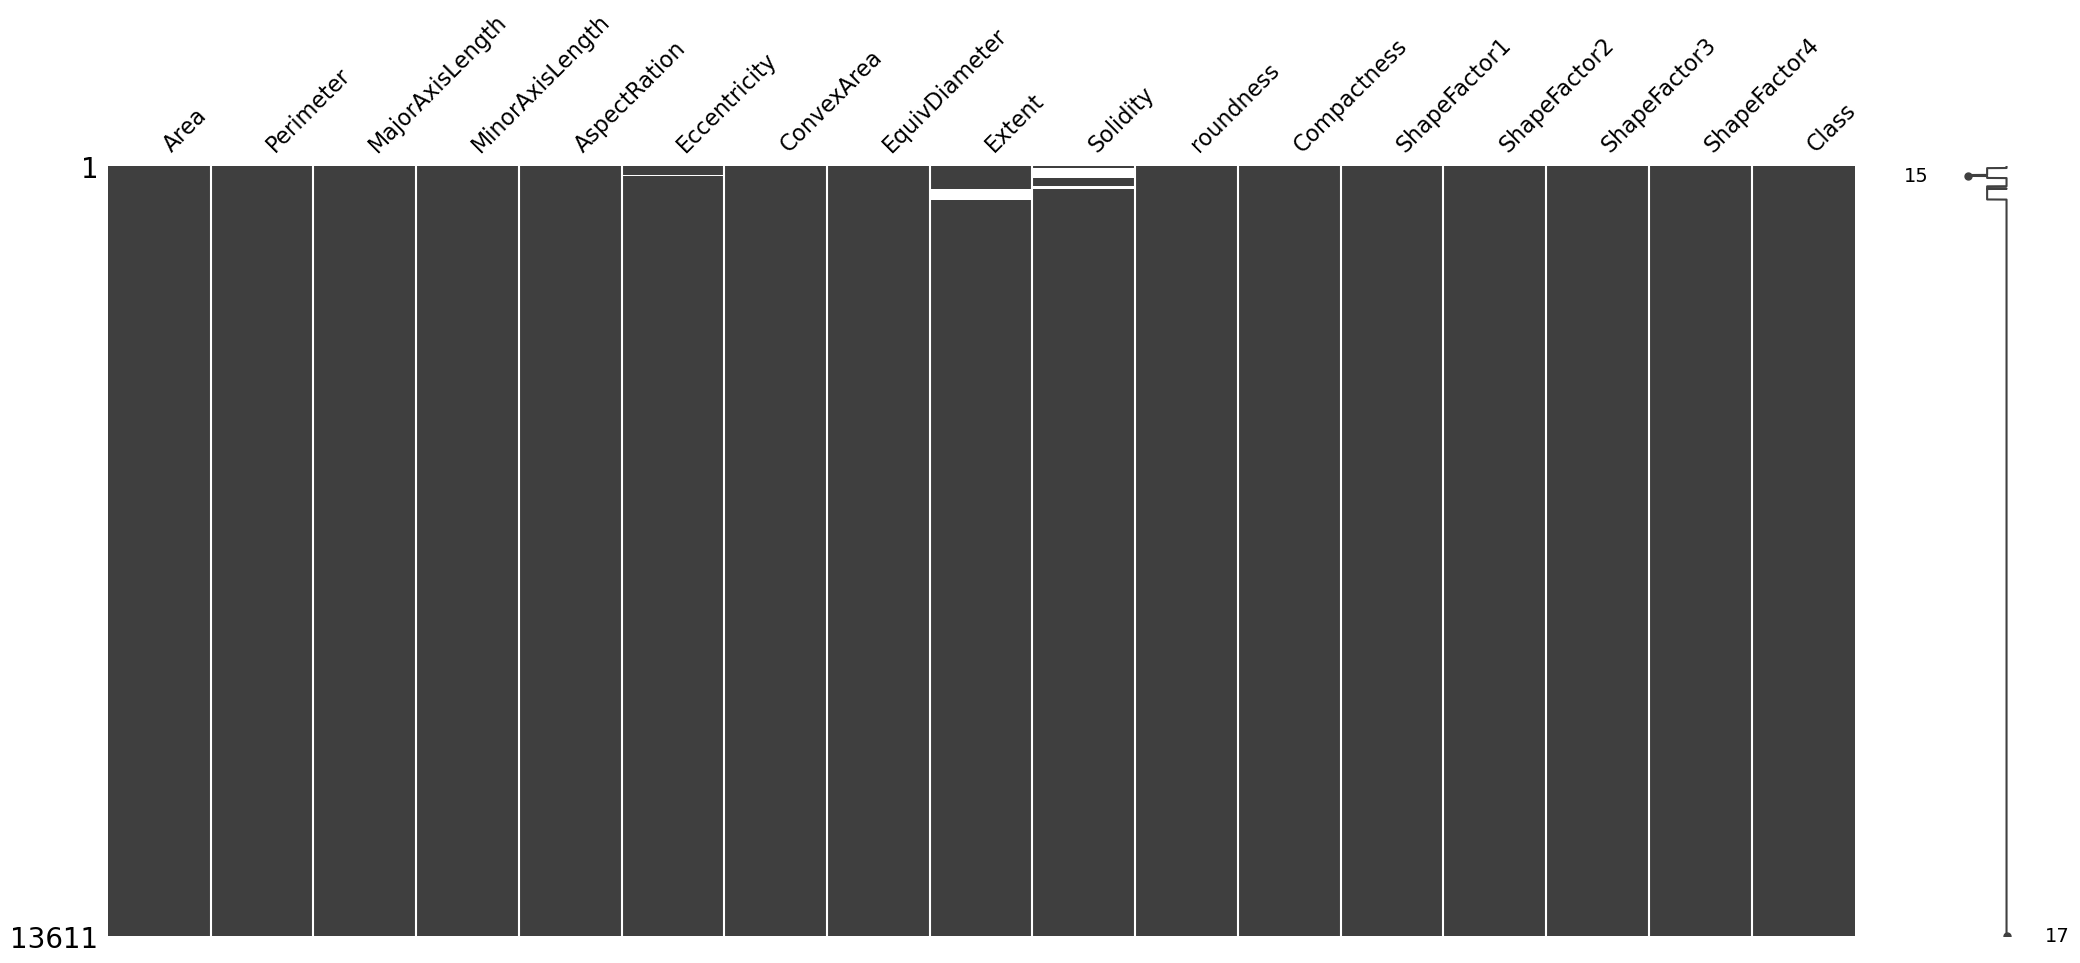

In [10]:
msno.matrix(df)

In [11]:
#filling the null values in the row by mean
grp_state = df.groupby('Class')
def impute_mean_by_state(series):
    return series.fillna(series.mean())

In [12]:
df['Eccentricity']=grp_state['Eccentricity'].transform(impute_mean_by_state)  #fill value with mean value group by state
df['Extent']=grp_state['Extent'].transform(impute_mean_by_state)
df['Solidity']=grp_state['Solidity'].transform(impute_mean_by_state)

Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe.From these plots, we can identify where missing values occur, the extent of the missingness and whether any of the missing values are correlated with each other.

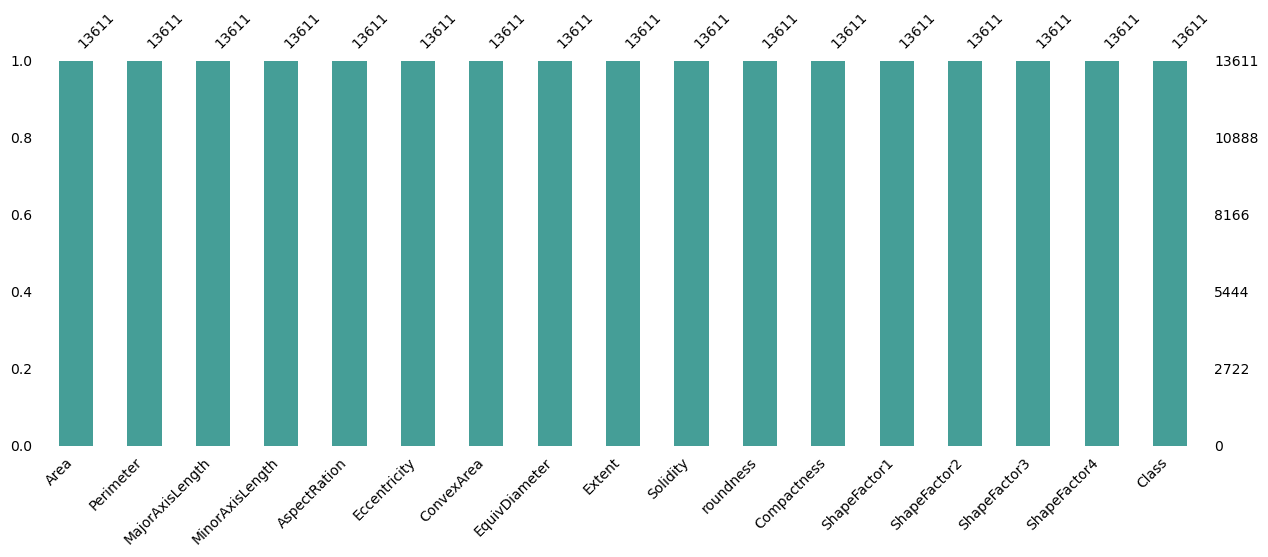

In [13]:
# to see the missing values in the form of the graph
msno.bar(df,figsize=(15, 5),fontsize=10,color = '#459E97');

<AxesSubplot:>

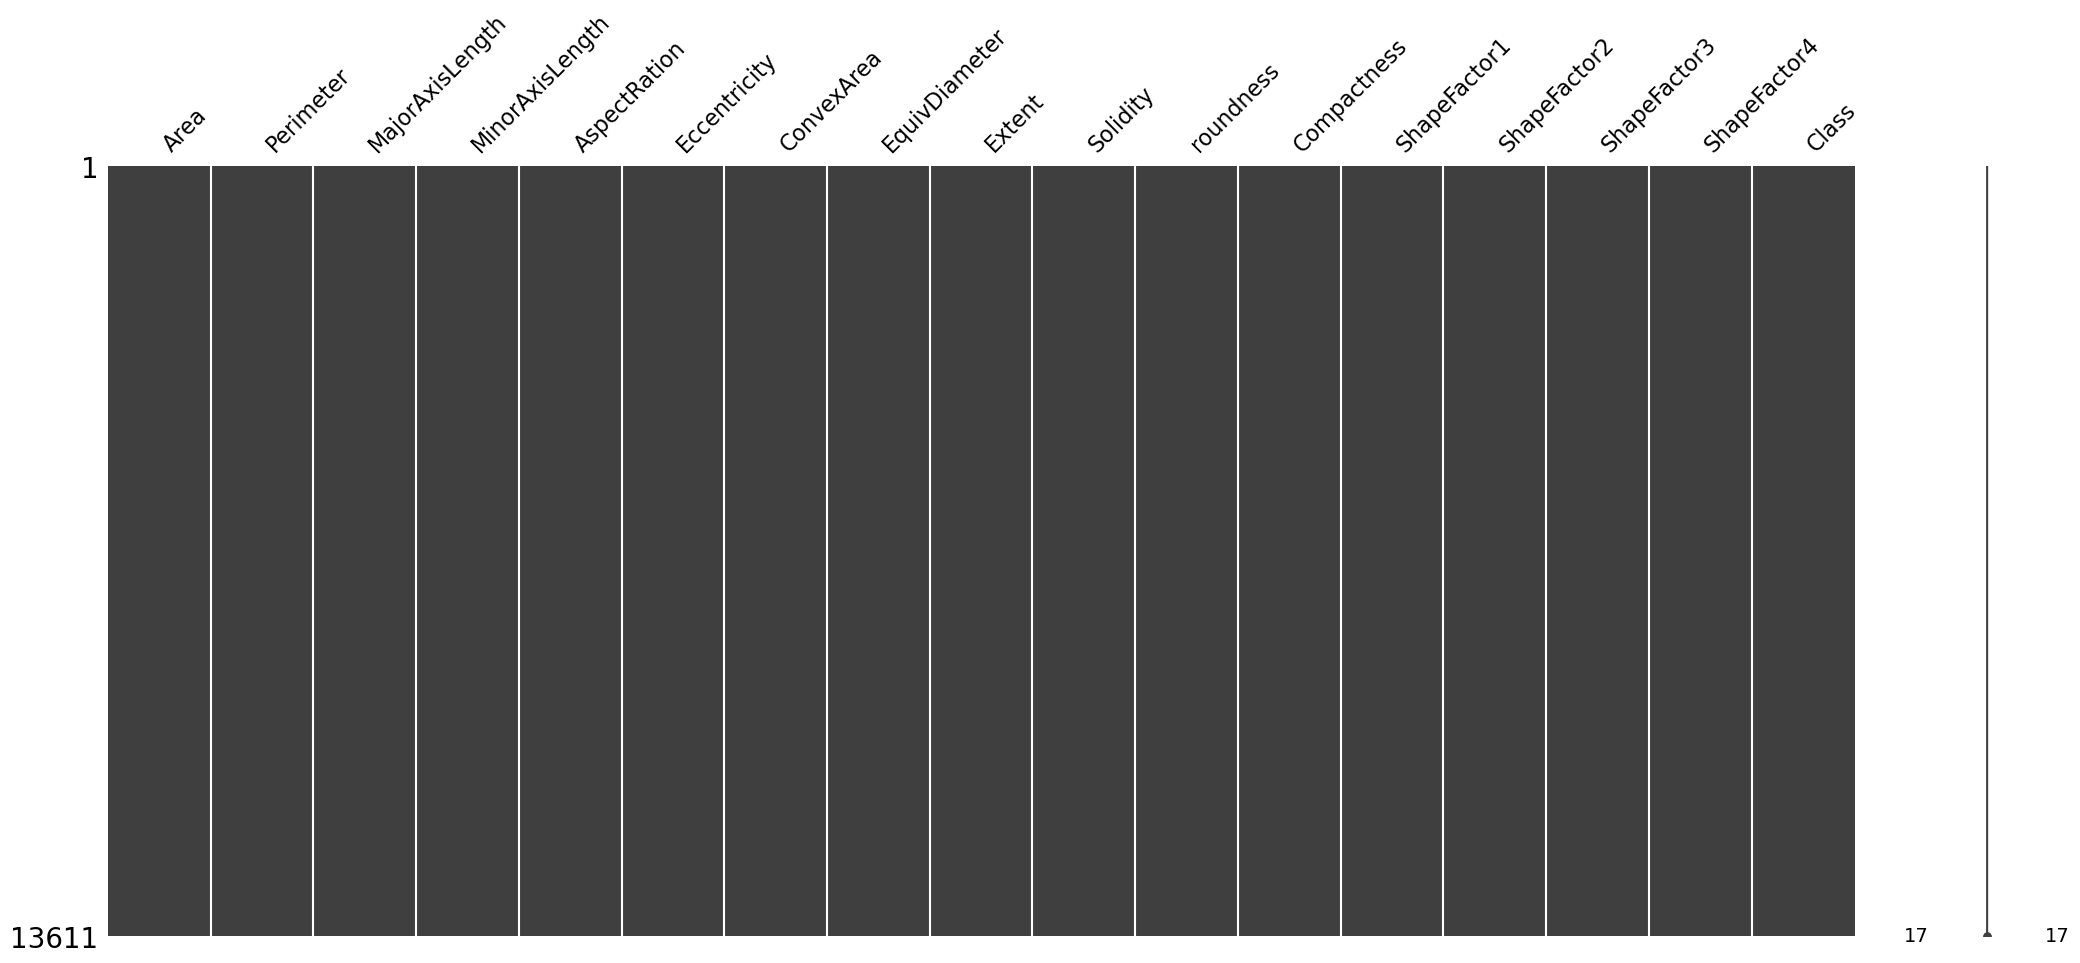

In [14]:
# matrix plot to see the missing value
msno.matrix(df)

# Correlation Matrix

It is interesting to note that a strong (linear) correlation is observed between some features. For example, between "convex_area" and "area", and between "compactness" and "shape_factor_3". This is not a surprise, since the "area" is tightly related to the "convex_area". It is not quite clear how "shape_factor_3" (as well as the other "shape factors") is calculated but it might be assumed that beans' "compactness" might played a role.

As a whole, there is a strong (both positive and negative) correlation between features. An attempt was made for removing the most correlated ones but less features didn't affect the Neural Network's performance. Therefore, the final model works with all features.

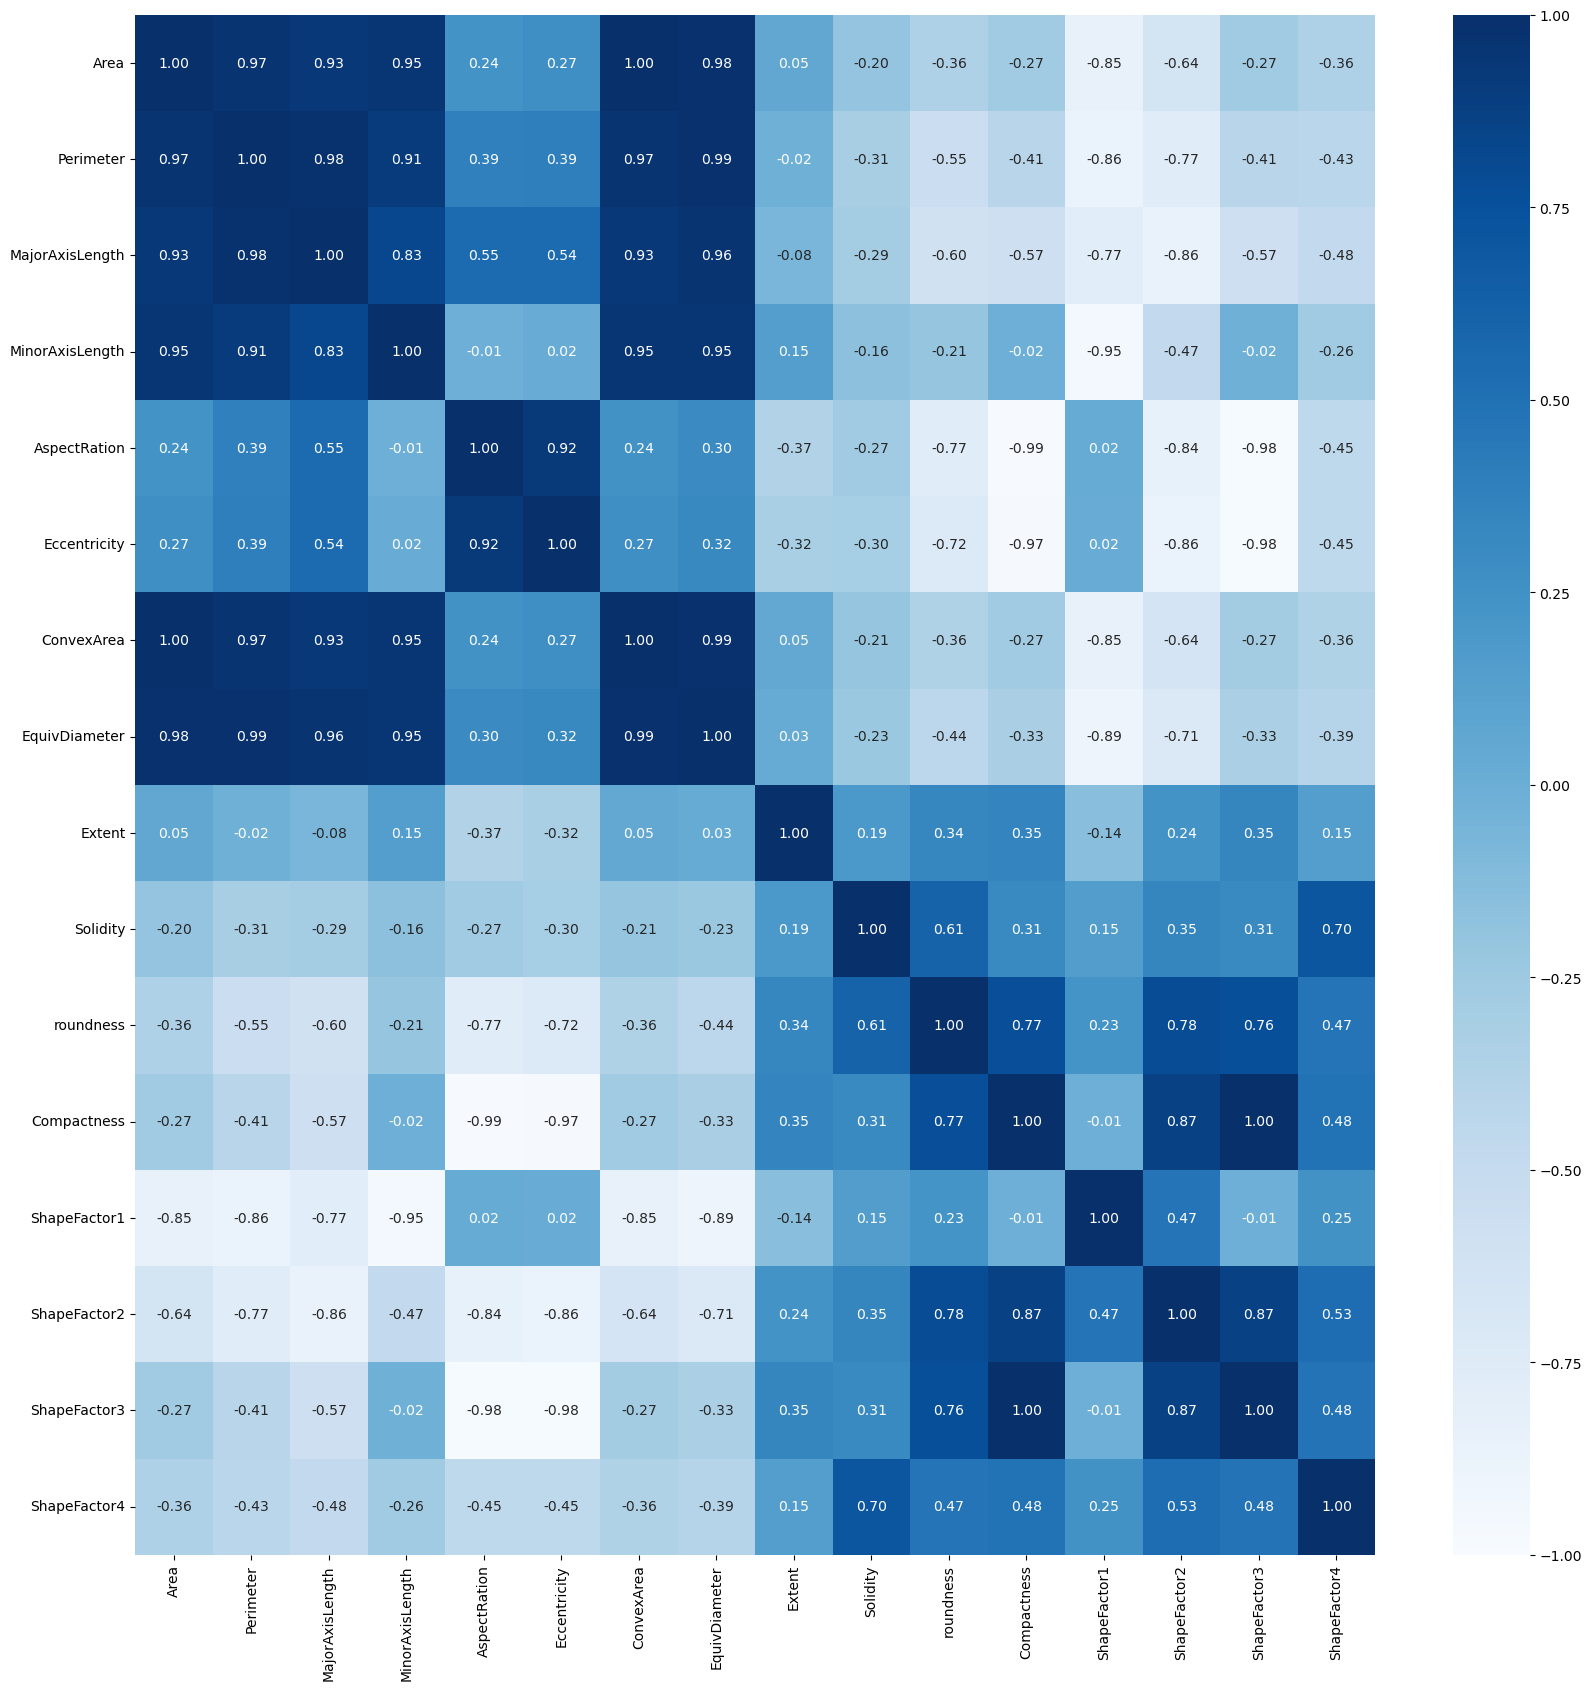

In [15]:
# Display correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "Blues",
            fmt = ".2f",
            vmin = -1.00, vmax = 1.00)
plt.show()

In [16]:
#dependent variable y counts
p = df.Class.value_counts()
p

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

# Display beans per type
The plot below shows that the dataset is quite imbalanced. Some beans are over-sampled (e.g., "Dermason"), whereas others - under-sampled (e.g., "Bombay").

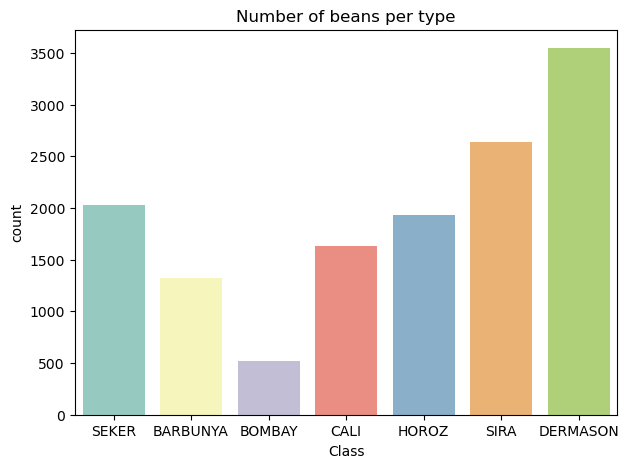

In [17]:
#plotting the dependent variable beans
plt.figure(figsize = (7, 5))
sns.countplot(x = df["Class"], palette="Set3")
plt.title("Number of beans per type")
plt.show()

In [18]:
#after preprocessing the missing values are filled with the mean values of the columns
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [19]:
#Encoding the dependent column class using LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

# Feature engineering

In [20]:
# only independent variables 
x1 = df.drop(['Class'],axis='columns')
x1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [21]:
#dependent variable y: Class 
y = df['Class']
y

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int32

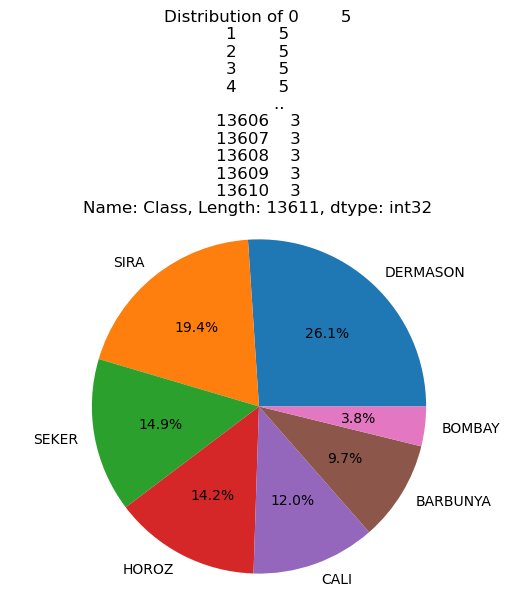

In [22]:
plt.pie(p, labels=p.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title(f"Distribution of {y}")
plt.show()

# LABEL ENCODING
 In label encoding in Python, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4).
 After Label encoding the numerical values are given as 
 BARBUNYA 0, BOMBAY 1, CALI 2, DERMASON 3, HOROZ 4, SEKER 5, SIRA 6, 

In [23]:
#filling the null values in the row by mean
grp_state = df.groupby('Class')
def impute_mean_by_state(series):
    return series.fillna(series.mean())
#fill value with mean value group by Class
df['Eccentricity']=grp_state['Eccentricity'].transform(impute_mean_by_state)  
df['Extent']=grp_state['Extent'].transform(impute_mean_by_state)
df['Solidity']=grp_state['Solidity'].transform(impute_mean_by_state)

Boxplot is a chart that is used to visualize how a given data (variable) is distributed using quartiles. It shows the minimum, maximum, median, first quartile and third quartile in the data set.
This is used to check the outliers in the dataset.

# Before removing the outliers

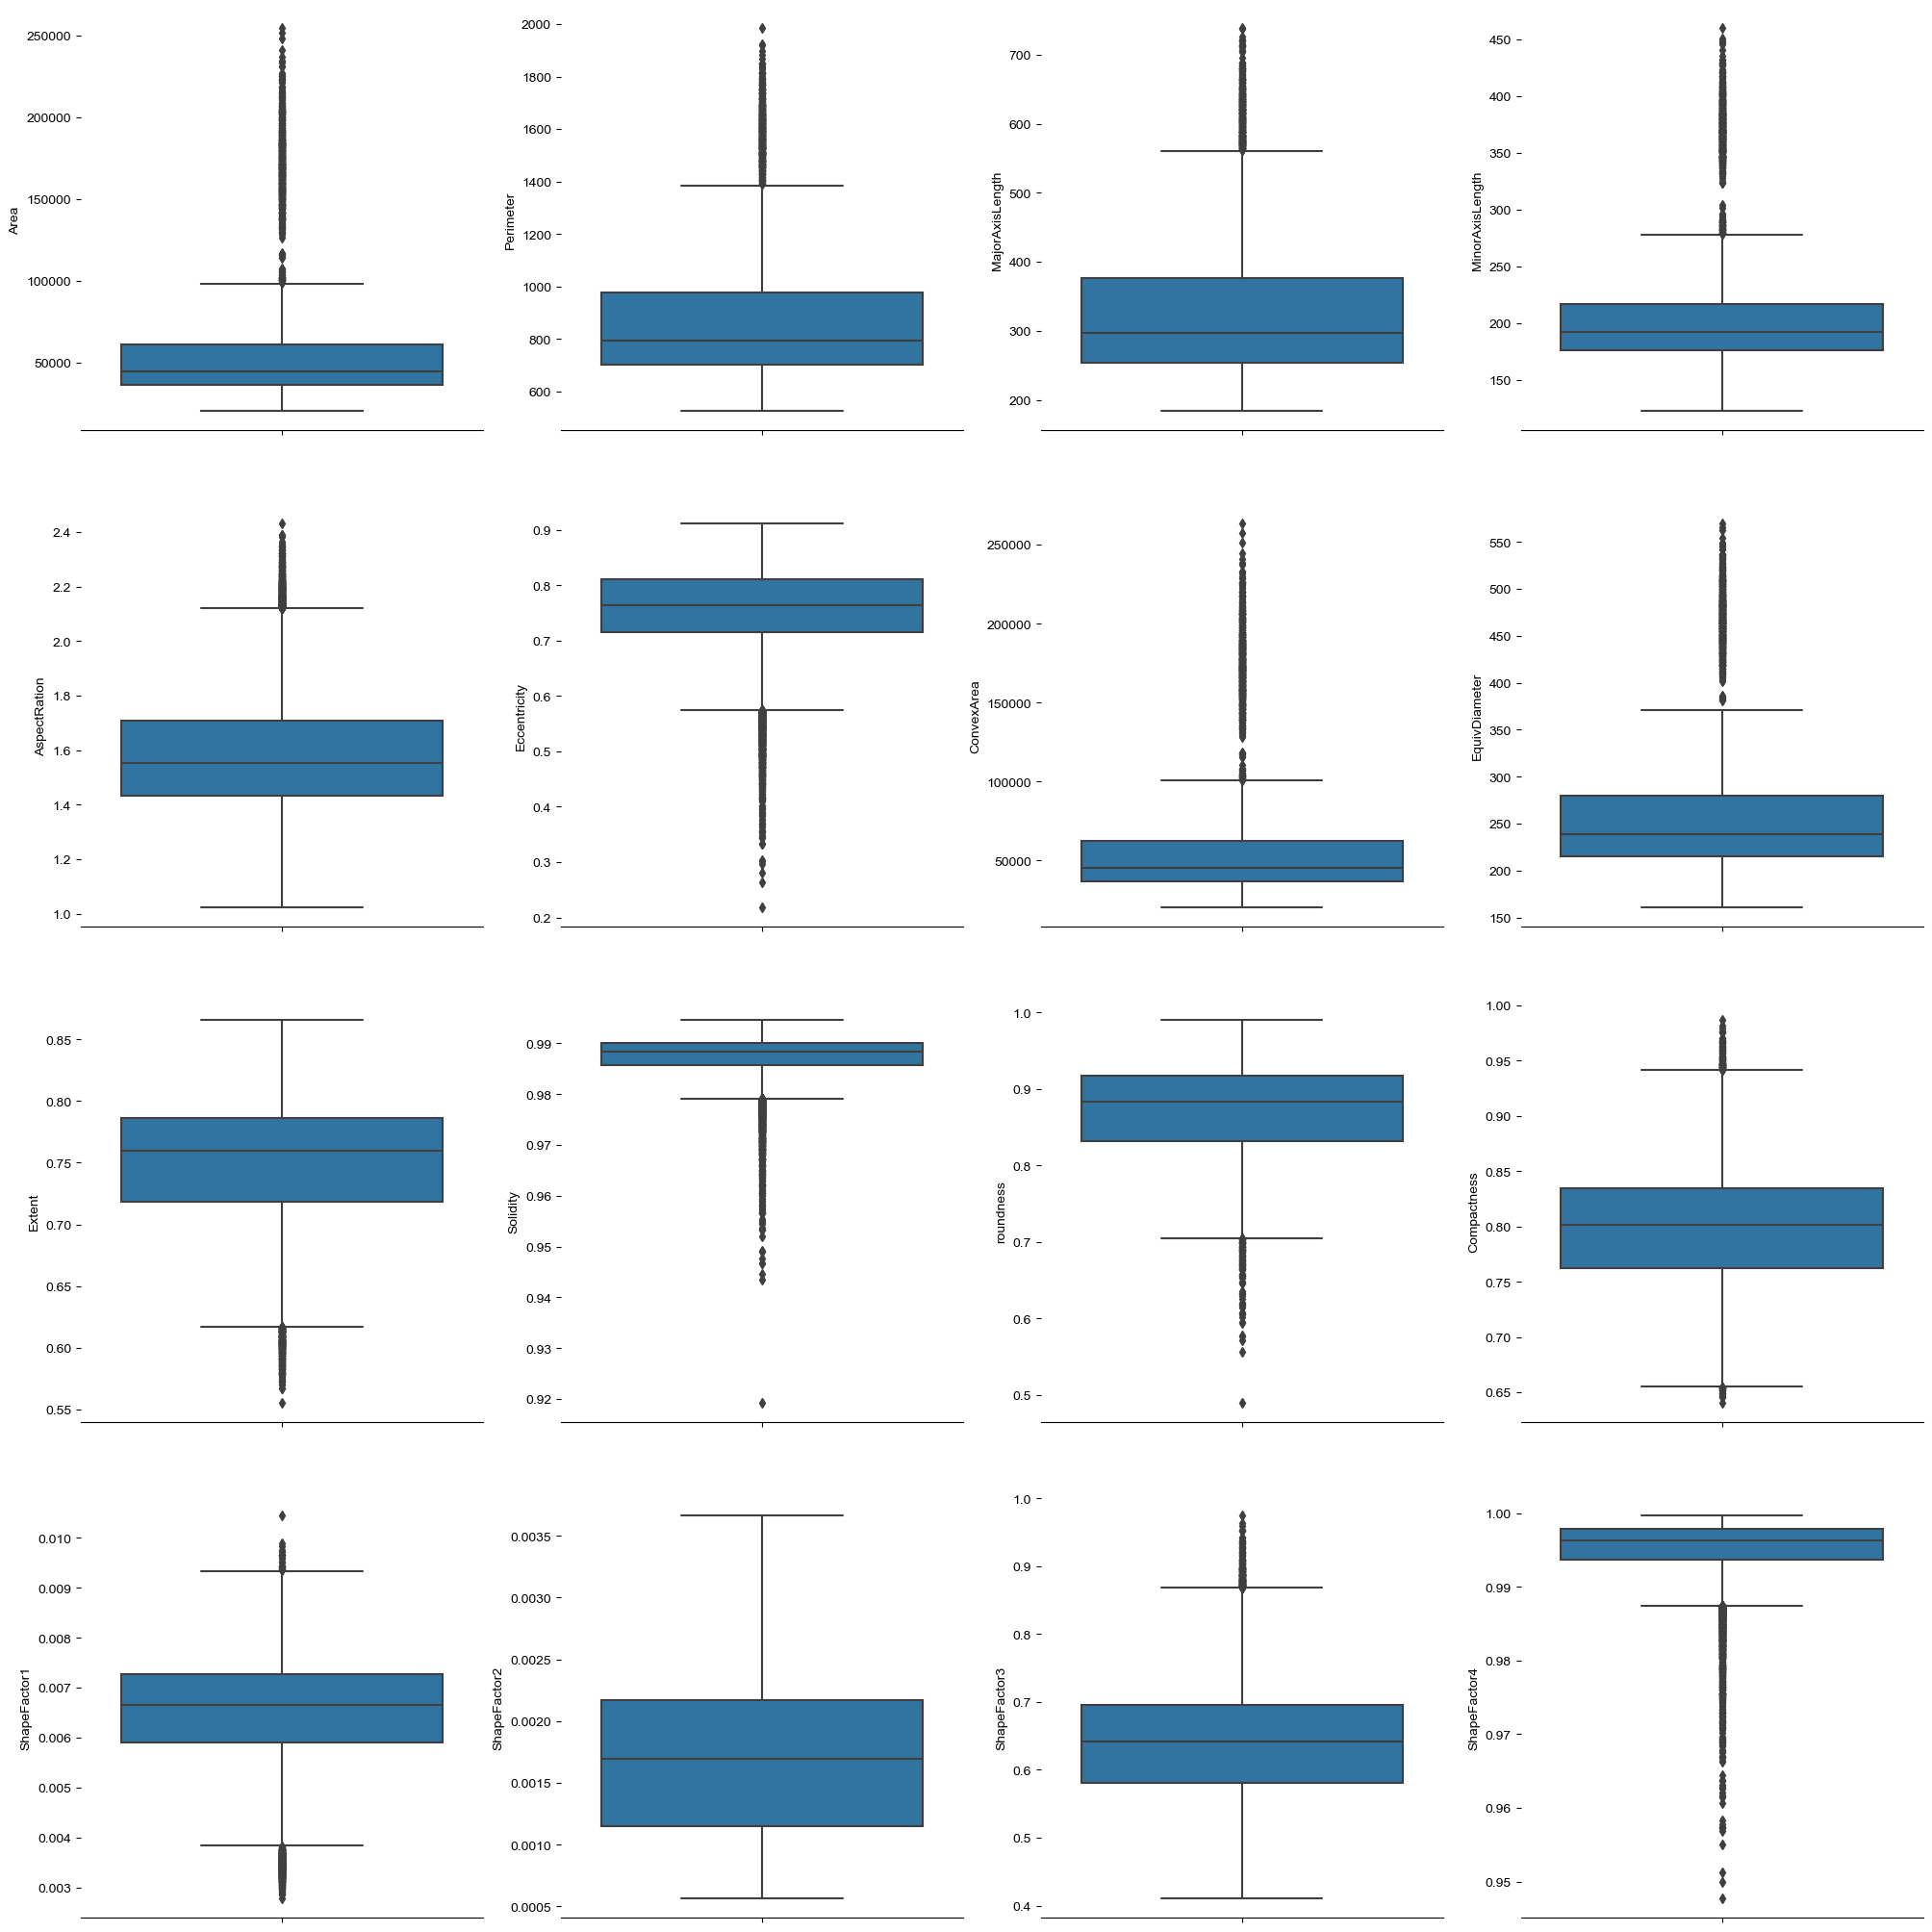

In [24]:
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
idx = 0
axs = axs.flatten()
for column in x1.columns:
    sns.boxplot(y=column, data = df, ax = axs[idx])
    idx += 1
    sns.set_style('whitegrid')
    sns.despine(left=True)
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

# Capping Method to remove outliers

The capping method is one way to remove outliers in a machine learning dataset. This method involves setting a lower and upper bound for the values of a feature, and any values that fall outside of these bounds are capped or truncated to the boundary value. The capping method is useful when you want to preserve the shape of the distribution and avoid removing too many data points.
Other techniques include the Interquartile Range (IQR) method, Z-score method, and more advanced techniques such as clustering and anomaly detection.

In [25]:
def cap_data(df):
    for col in df.columns:
        print("\n\n capping the \n",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            
            q1=df[col].quantile(0.25)
            q3=df[col].quantile(0.75)
            iqr=q3-q1
            lower,upper=(q1-(iqr*1.5)),(q3+(iqr*1.5))    
            print("q1=",q1,"q3=",q3,"iqr=",iqr,"lower=",lower,"upper=",upper) 
            df[col][df[col] <= lower] = lower
            df[col][df[col] >= upper] = upper
            print("\n",df[col][df[col] <= lower] )
            print("\n",df[col][df[col] >= upper] )
            
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)



 capping the 
 Area
q1= 36328.0 q3= 61332.0 iqr= 25004.0 lower= -1178.0 upper= 98838.0

 Series([], Name: Area, dtype: int64)

 3344    98838
3345    98838
3346    98838
3347    98838
3348    98838
        ...  
5496    98838
5497    98838
5498    98838
5499    98838
5500    98838
Name: Area, Length: 551, dtype: int64


 capping the 
 Perimeter
q1= 703.5235 q3= 977.213 iqr= 273.68949999999995 lower= 292.9892500000001 upper= 1387.74725

 Series([], Name: Perimeter, dtype: float64)

 3364    1387.74725
3368    1387.74725
3369    1387.74725
3371    1387.74725
3372    1387.74725
           ...    
3866    1387.74725
3867    1387.74725
3868    1387.74725
3869    1387.74725
3870    1387.74725
Name: Perimeter, Length: 500, dtype: float64


 capping the 
 MajorAxisLength
q1= 253.30363269999998 q3= 376.49501245 iqr= 123.19137975000001 lower= 68.51656307499997 upper= 561.2820820750001

 Series([], Name: MajorAxisLength, dtype: float64)

 3426    561.282082
3427    561.282082
3429    561.282082

C:\Users\soupa\AppData\Local\Temp\ipykernel_17600\3539323121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= lower] = lower
C:\Users\soupa\AppData\Local\Temp\ipykernel_17600\3539323121.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= upper] = upper
C:\Users\soupa\AppData\Local\Temp\ipykernel_17600\3539323121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= lower] = l

# After removing the outliers

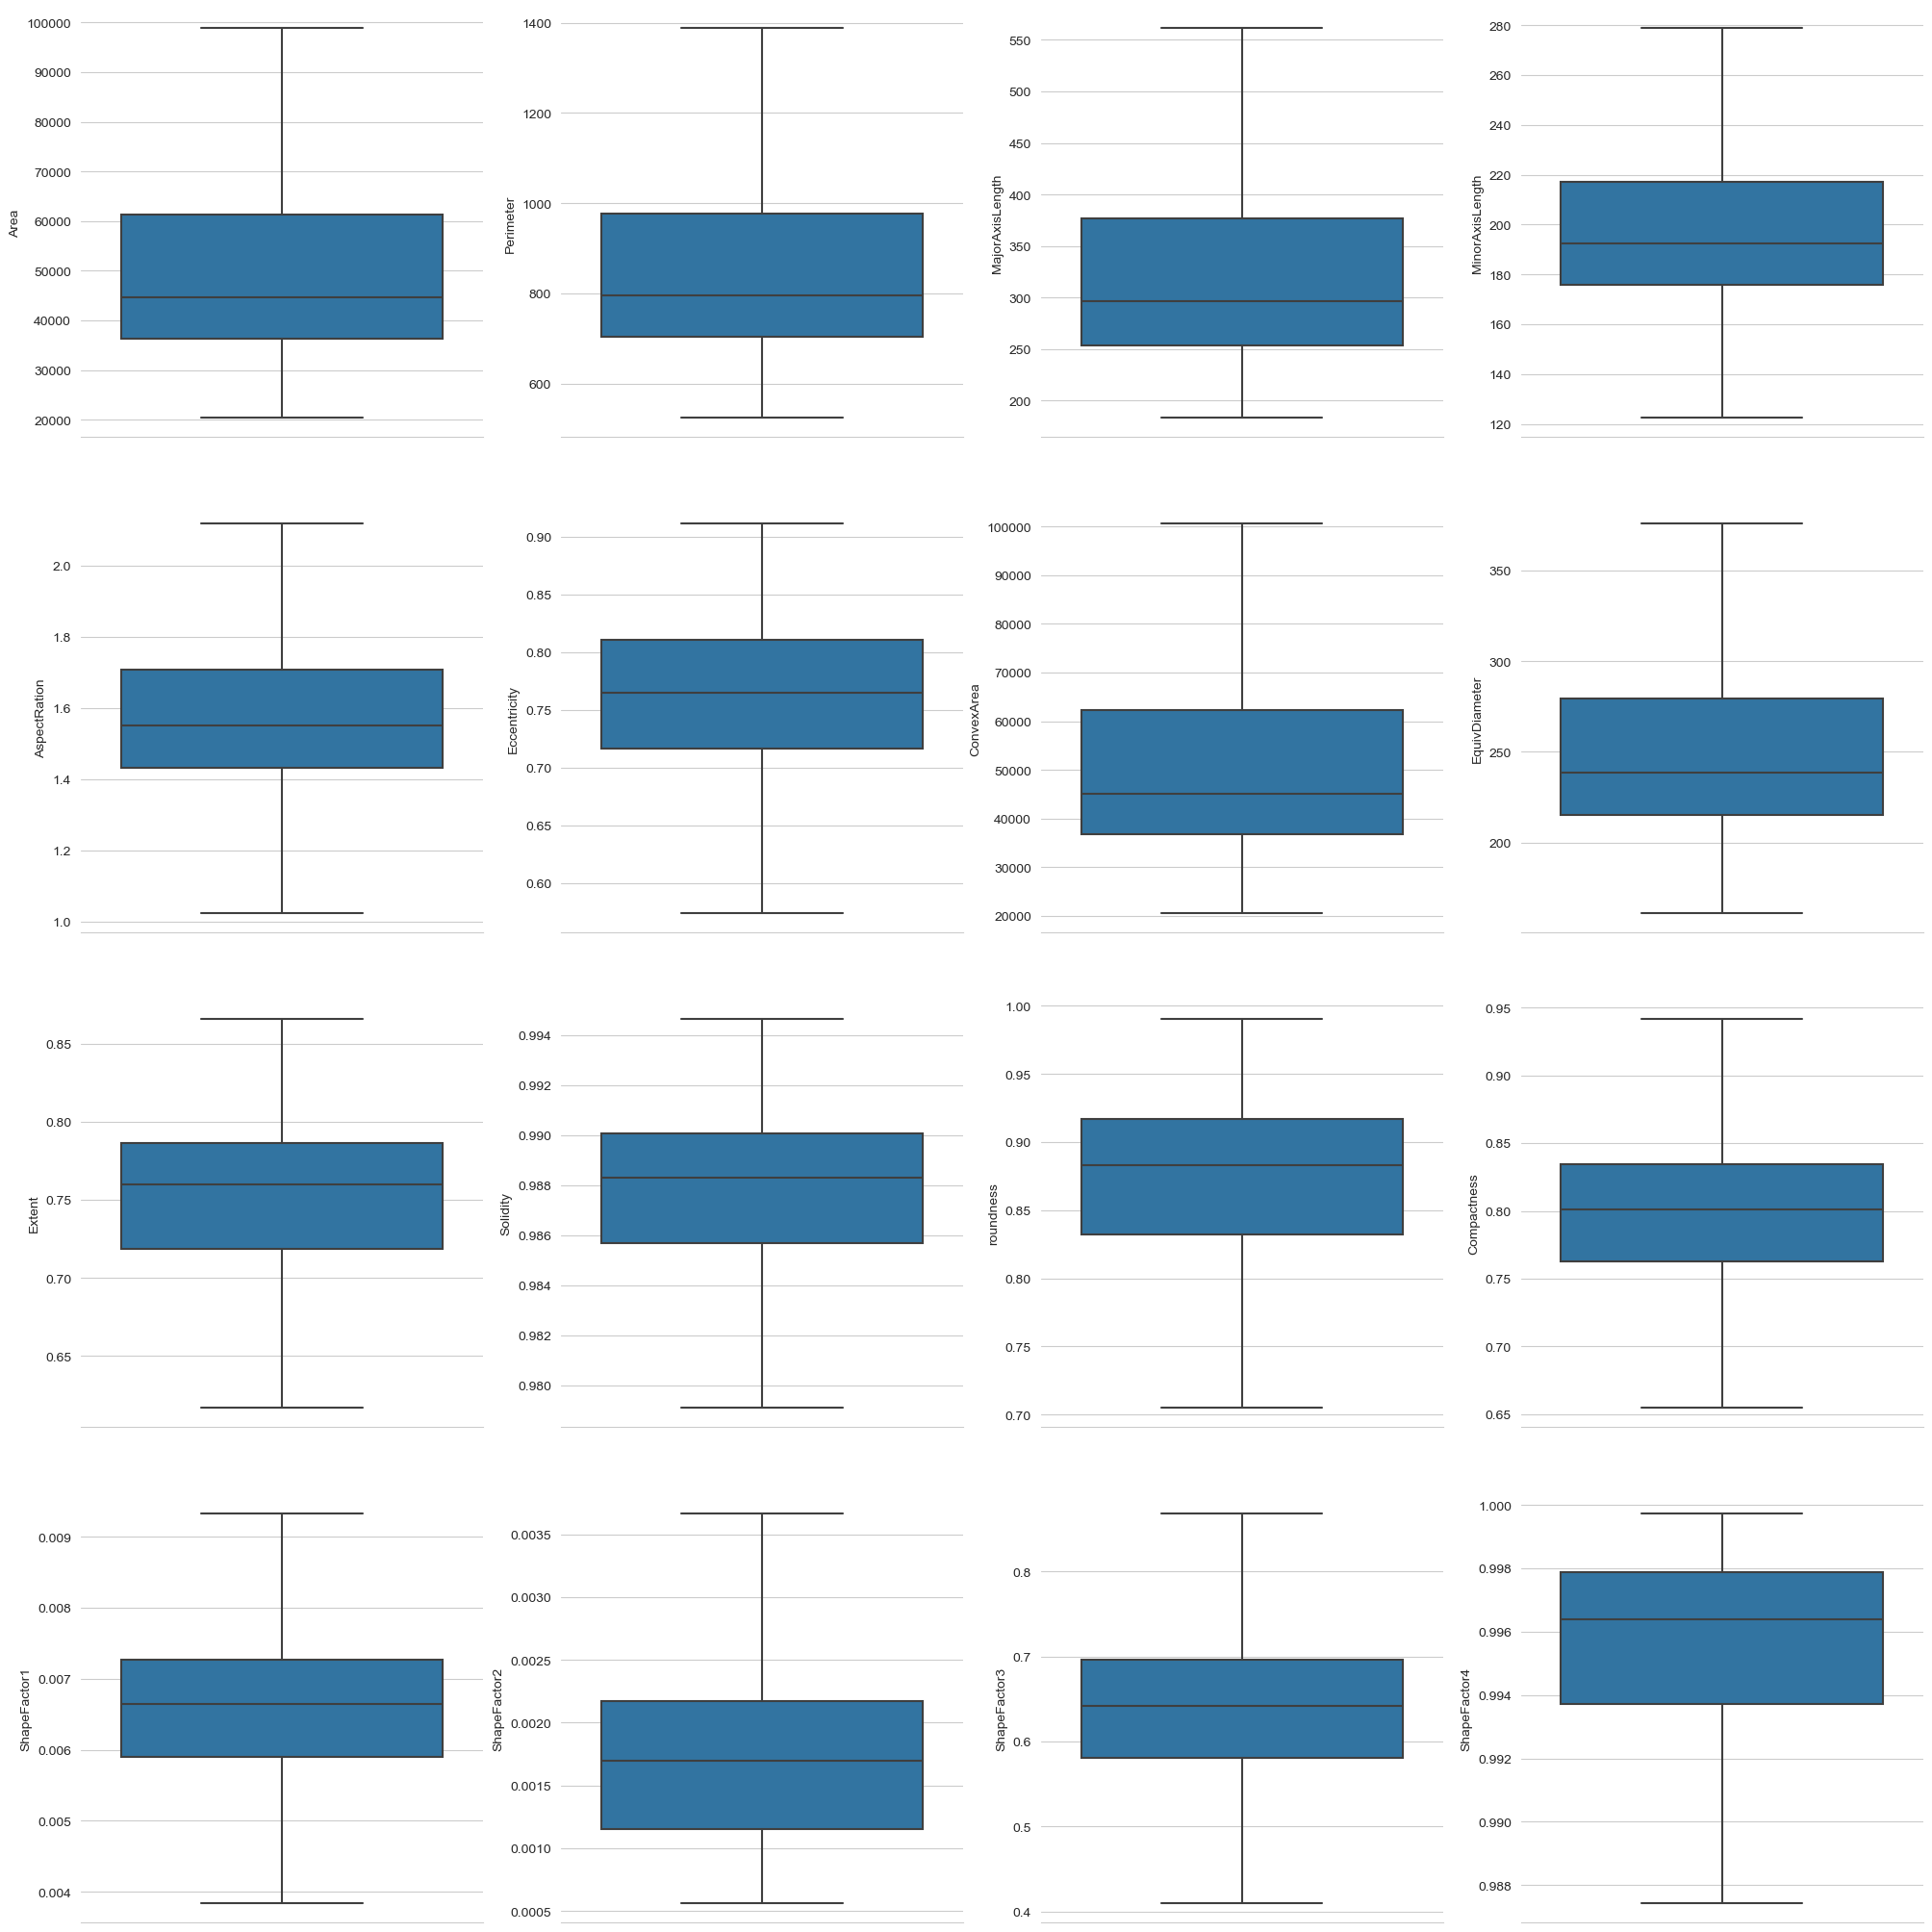

In [26]:
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
idx = 0
axs = axs.flatten()
for column in x1.columns:
    sns.boxplot(y=column, data = final_df, ax = axs[idx])
    idx += 1
    sns.set_style('whitegrid')
    sns.despine(left=True)
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

#    Model Selection

In [27]:
# splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [28]:
x1.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [29]:
"""sc = StandardScaler()
scaled = sc.fit_transform(x1)
print(scaled)
#X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)

#scaled1 = scaled.astype(int)
#X_val_scaled = sc.transform(X_val[cols])
#X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)
"""

'sc = StandardScaler()\nscaled = sc.fit_transform(x1)\nprint(scaled)\n#X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)\n\n#scaled1 = scaled.astype(int)\n#X_val_scaled = sc.transform(X_val[cols])\n#X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)\n'

In [30]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()

# fit the scaler to the data and transform it
normalized_data = scaler.fit_transform(x1_train,y_train)

# print the normalized data
print(normalized_data)

[[0.03696049 0.07641682 0.09267811 ... 0.53960303 0.45410334 0.93949718]
 [0.07545389 0.15777395 0.15754183 ... 0.43423253 0.43617449 0.91478674]
 [0.04504347 0.08680546 0.08385802 ... 0.63683338 0.58721803 0.93950267]
 ...
 [0.29711865 0.43259502 0.49208608 ... 0.12170112 0.23751949 0.89053356]
 [0.07688432 0.12780478 0.11363246 ... 0.64312683 0.69395623 0.98257297]
 [0.18449504 0.3235951  0.39113817 ... 0.13601559 0.15737382 0.82658909]]


In [31]:
#sac = pd.DataFrame(normalized_data, columns=['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4'])
#sac

In [32]:
from sklearn.tree import DecisionTreeClassifier
#It is a tree-structured classifier, where internal nodes represent the features of a dataset, 
#branches represent the decision rules and each leaf node represents the outcome.
from sklearn.ensemble import RandomForestClassifier
#a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier


models = [
    ('RandomForest',  RandomForestClassifier()),
    (' SVC',  SVC()),
    ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=4)),
    ('DecisionTreeClassifier',DecisionTreeClassifier())
   
]

# Evaluate each model on the training set
results = []
names = []
for name, model in models:
    model.fit(x1_train, y_train)
    score = model.score(x1_train, y_train)
    test_score = model.score(x1_test, y_test)
    results.append(score)
    names.append(name)
    print(f"{name}: training score={score}")
    print(f"Test score: {test_score} ")
    print("-----------------------------------------------------------------------")

# Select the best model based on training score
best_idx = np.argmax(results)
best_name = names[best_idx]
best_model = models[best_idx][1]
print(f"\nBest model: {best_name} ({results[best_idx]} training score)")

# Evaluate the best model on the testing set
test_score = best_model.score(x1_test, y_test)
print(f"Test score: {test_score}")


RandomForest: training score=1.0
Test score: 0.9239809034153507 
-----------------------------------------------------------------------
 SVC: training score=0.6362049963262307
Test score: 0.6312890194638267 
-----------------------------------------------------------------------


C:\Users\soupa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\soupa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier: training score=0.830088170462895
Test score: 0.7164891663606316 
-----------------------------------------------------------------------
DecisionTreeClassifier: training score=1.0
Test score: 0.8931325743665075 
-----------------------------------------------------------------------

Best model: RandomForest (1.0 training score)
Test score: 0.9239809034153507


In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 244, 288, 333, 377, 422, 466, 511, 555, 600], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [36]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
# fit the randomized model
rf_randomcv.fit(x1_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 244, 288, 333,
                                                         377, 422, 466, 511,
                                                         555, 600]},
                   random_state=100, verbose=2)

In [37]:
rf_randomcv.best_params_

{'n_estimators': 466,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [38]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 244, 288, 333,
                                                         377, 422, 466, 511,
                                                         555, 600]},
                   random_state=100, verbose=2)

In [41]:
rf=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x1_train,y_train)

In [42]:
#manual hyperparameter tuning
predictions=rf.predict(x1_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[232   0  18   0   1   2   8]
 [  0 117   0   0   0   0   0]
 [ 12   0 298   0   4   1   2]
 [  0   0   0 620   2   4  45]
 [  1   0   7   5 387   0   8]
 [  3   0   0  11   0 390   9]
 [  0   0   0  51   6   8 471]]
0.9236136614028645
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       261
           1       1.00      1.00      1.00       117
           2       0.92      0.94      0.93       317
           3       0.90      0.92      0.91       671
           4       0.97      0.95      0.96       408
           5       0.96      0.94      0.95       413
           6       0.87      0.88      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [43]:
rf = RandomForestClassifier()
rf.fit(x1_train, y_train)

RandomForestClassifier()

In [44]:
y_pred = rf.predict(x1_test)
y_pred

array([5, 0, 5, ..., 3, 2, 3])

In [45]:
print(classification_report(y_test, model.predict(x1_test)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       261
           1       1.00      1.00      1.00       117
           2       0.89      0.91      0.90       317
           3       0.89      0.88      0.89       671
           4       0.94      0.93      0.93       408
           5       0.93      0.92      0.92       413
           6       0.83      0.84      0.84       536

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723



In [46]:
input_data = (42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The dry bean is BARBUNYA')
elif (prediction[0]==1):
  print('The dry bean is BOMBAY')
elif (prediction[0]==2):
    print('The dry bean is CALI')
elif (prediction[0]==3):
    print('The dry bean is DERMASON')
elif (prediction[0]==4):
    print('The dry bean is HOROZ')
elif (prediction[0]==5):
    print('The dry bean is SEKER')
else:
    print('The dry bean is SIRA')

[3]
The dry bean is DERMASON


C:\Users\soupa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pk = pickle.dump(rf, open('beanmodel.pkl','wb'))

In [ ]:
with open('beanmodel','wb') as f:
    pickle.dump(rf,f)

In [ ]:
with open('beanmodel','rb') as f:
    mp=pickle.load(f)

In [ ]:
input_data = (42997,259.696,228.721612,985.944789,1.52728,0.765002,42898,231.515799,0.714574,0.990331,0.126603,0.801865,0.006858,0.001749,0.642988,0.998385)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = mp.predict(input_data_reshaped)
print(prediction)
#SEKER 5, BARBUNYA 0, BOMBAY 1, CALI 2, HOROZ 4, SIRA 6, DERMASON 3
if (prediction[0]==0):
  print('The dry bean is BARBUNYA')
elif (prediction[0]==1):
  print('The dry bean is BOMBAY')
elif (prediction[0]==2):
    print('The dry bean is CALI')
elif (prediction[0]==3):
    print('The dry bean is DERMASON')
elif (prediction[0]==4):
    print('The dry bean is HOROZ')
elif (prediction[0]==5):
    print('The dry bean is SEKER')
else:
    print('The dry bean is SIRA')
